In [1]:
import pandas as pd
# Cargamos el fichero de datos en un dataframe
fecha = '04-22'
fname = '../../data/' + fecha + '-dataset.csv'
df = pd.read_csv(fname)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   replay             158 non-null    object 
 1   user               158 non-null    object 
 2   group              158 non-null    object 
 3   puzzle             158 non-null    object 
 4   ActiveTime         158 non-null    float64
 5   InactiveTime       158 non-null    float64
 6   CreateShape        158 non-null    int64  
 7   RotateShape        158 non-null    int64  
 8   MoveShape          158 non-null    int64  
 9   ScaleShape         158 non-null    int64  
 10  DeleteFigure       158 non-null    int64  
 11  RotateView         158 non-null    int64  
 12  Snapshots          158 non-null    int64  
 13  CheckSolution      158 non-null    int64  
 14  cube               158 non-null    int64  
 15  pyramid            158 non-null    int64  
 16  ramp               158 non

Para el modelo de momento no nos interesan los id de usuario, grupo y replay, así que los eliminamos.

In [3]:
df = df.drop(columns=['replay','user','group'])
df.describe()

,ActiveTime,InactiveTime,CreateShape,RotateShape,MoveShape,ScaleShape,DeleteFigure,RotateView,Snapshots,CheckSolution,cube,pyramid,ramp,cylinder,cone,sphere,spatial_reasoning
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,127.130391,32.179771,4.177215,9.544304,7.943038,3.670886,0.430380,8.449367,1.113924,1.898734,1.291139,1.398734,0.778481,0.145570,0.158228,0.405063,3.066456
std,115.976784,113.357657,1.443276,16.202774,10.050981,4.400989,1.119412,14.070137,3.208219,1.548329,1.459883,1.729990,1.695342,0.550922,0.498688,0.517687,0.622543
min,24.435621,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,63.643063,0.000000,3.000000,2.000000,0.250000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.510417
50%,104.213447,0.000000,4.000000,4.000000,4.000000,1.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.166667
75%,149.770878,0.000000,5.000000,12.000000,12.000000,5.000000,0.000000,10.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,3.500000
max,1180.873135,1119.839469,11.000000,153.000000,54.000000,20.000000,8.000000,96.000000,25.000000,9.000000,10.000000,7.000000,8.000000,4.000000,4.000000,2.000000,4.000000


Como es probable que la correlación sea baja en la mayoría de predictores, vamos a comprobar si separando por puzle obtenemos una correlación más alta.

In [4]:
corr_matrix = df.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
ramp                 0.025939
sphere               0.024916
cone                -0.012715
cube                -0.048095
cylinder            -0.202491
pyramid             -0.217461
InactiveTime        -0.277152
CreateShape         -0.351589
DeleteFigure        -0.387349
RotateShape         -0.401556
Snapshots           -0.410291
RotateView          -0.475068
ScaleShape          -0.477295
MoveShape           -0.573000
CheckSolution       -0.612929
ActiveTime          -0.644308
Name: spatial_reasoning, dtype: float64

In [5]:
bird_fez = df.loc[df['puzzle']=='Bird Fez']
corr_matrix = bird_fez.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
cone                 0.178537
Snapshots           -0.043752
ramp                -0.175787
sphere              -0.175787
ScaleShape          -0.321412
cube                -0.337095
InactiveTime        -0.390807
RotateView          -0.398667
cylinder            -0.519610
CreateShape         -0.557157
DeleteFigure        -0.557157
pyramid             -0.572560
RotateShape         -0.619273
CheckSolution       -0.643753
ActiveTime          -0.773300
MoveShape           -0.805306
Name: spatial_reasoning, dtype: float64

In [6]:
pi_henge = df.loc[df['puzzle']=='Pi Henge']
corr_matrix = pi_henge.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
cube                -0.077529
ramp                -0.091746
sphere              -0.091746
InactiveTime        -0.213227
cylinder            -0.277502
CreateShape         -0.291270
Snapshots           -0.301651
DeleteFigure        -0.324380
RotateShape         -0.438269
RotateView          -0.644225
CheckSolution       -0.655588
ScaleShape          -0.656646
ActiveTime          -0.700447
MoveShape           -0.745274
pyramid                   NaN
cone                      NaN
Name: spatial_reasoning, dtype: float64

In [7]:
degree_rotations = df.loc[df['puzzle']=='45-Degree Rotations']
corr_matrix = degree_rotations.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
sphere               0.049647
CreateShape         -0.153491
Snapshots           -0.163562
ramp                -0.182775
DeleteFigure        -0.303111
RotateView          -0.386638
InactiveTime        -0.453562
ScaleShape          -0.523344
MoveShape           -0.592656
ActiveTime          -0.620135
RotateShape         -0.642790
CheckSolution       -0.691465
cube                      NaN
pyramid                   NaN
cylinder                  NaN
cone                      NaN
Name: spatial_reasoning, dtype: float64

In [8]:
angled_silhouette = df.loc[df['puzzle']=='Angled Silhouette']
corr_matrix = angled_silhouette.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
cone                -0.293832
InactiveTime        -0.408936
cube                -0.445221
ramp                -0.519206
CheckSolution       -0.637312
pyramid             -0.641871
MoveShape           -0.668262
DeleteFigure        -0.708364
ScaleShape          -0.710651
Snapshots           -0.752401
CreateShape         -0.763546
ActiveTime          -0.796595
RotateShape         -0.804393
RotateView          -0.933992
cylinder                  NaN
sphere                    NaN
Name: spatial_reasoning, dtype: float64

In [9]:
pyramids = df.loc[df['puzzle']=='Pyramids are Strange']
corr_matrix = pyramids.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
InactiveTime        -0.200599
DeleteFigure        -0.259235
CreateShape         -0.347485
pyramid             -0.347485
MoveShape           -0.453795
ScaleShape          -0.528873
Snapshots           -0.530218
RotateView          -0.574975
CheckSolution       -0.602243
RotateShape         -0.612414
ActiveTime          -0.778300
cube                      NaN
ramp                      NaN
cylinder                  NaN
cone                      NaN
sphere                    NaN
Name: spatial_reasoning, dtype: float64

In [10]:
# Vamos a procesar las variables categóricas
from sklearn.preprocessing import OneHotEncoder
df_cat  = df.select_dtypes(include="object")
cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot = pd.DataFrame(cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out())
df_cat_1hot.head()


,puzzle_45-Degree Rotations,puzzle_Angled Silhouette,puzzle_Bird Fez,puzzle_Pi Henge,puzzle_Pyramids are Strange
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [11]:
df_numerical = df.drop(columns='puzzle')
df_numerical = pd.concat([df_numerical, df_cat_1hot], axis=1)
df_numerical.to_csv('../../data/' + fecha + '-dataset-numerical.csv', index=False)
df_numerical.head()

,ActiveTime,InactiveTime,CreateShape,RotateShape,MoveShape,ScaleShape,DeleteFigure,RotateView,Snapshots,CheckSolution,...,ramp,cylinder,cone,sphere,spatial_reasoning,puzzle_45-Degree Rotations,puzzle_Angled Silhouette,puzzle_Bird Fez,puzzle_Pi Henge,puzzle_Pyramids are Strange
0,127.222051,0.000000,4,2,6,3,1,7,0,1,...,0,1,0,1,2.916667,0.0,0.0,1.0,0.0,0.0
1,77.297240,0.000000,5,0,4,5,0,2,0,1,...,0,0,0,0,3.388889,0.0,0.0,0.0,1.0,0.0
2,125.033755,72.960352,5,12,0,2,1,5,2,1,...,0,0,0,0,3.000000,0.0,0.0,0.0,0.0,1.0
3,47.323649,53.387395,5,18,0,0,0,1,1,1,...,4,0,0,1,3.250000,1.0,0.0,0.0,0.0,0.0
4,230.708718,0.000000,5,2,19,16,0,16,0,4,...,0,3,0,0,2.458333,0.0,0.0,0.0,1.0,0.0


Ya no quedan varibles categóricas, por lo que podemos empezar a hacer cosas de verdad.

In [12]:
import numpy as np

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set, test_set = split_train_test(df,0.2)
print(len(train_set),'train +',len(test_set),'test')

127 train + 31 test


array([[<Axes: xlabel='ActiveTime', ylabel='ActiveTime'>,
        <Axes: xlabel='InactiveTime', ylabel='ActiveTime'>,
        <Axes: xlabel='spatial_reasoning', ylabel='ActiveTime'>],
       [<Axes: xlabel='ActiveTime', ylabel='InactiveTime'>,
        <Axes: xlabel='InactiveTime', ylabel='InactiveTime'>,
        <Axes: xlabel='spatial_reasoning', ylabel='InactiveTime'>],
       [<Axes: xlabel='ActiveTime', ylabel='spatial_reasoning'>,
        <Axes: xlabel='InactiveTime', ylabel='spatial_reasoning'>,
        <Axes: xlabel='spatial_reasoning', ylabel='spatial_reasoning'>]],
      dtype=object)

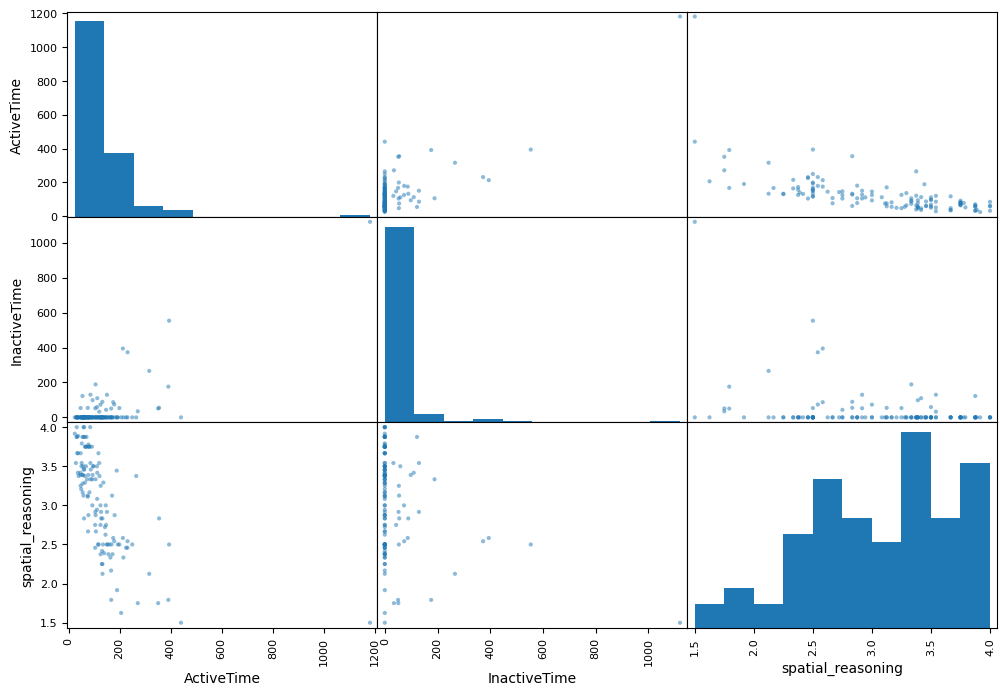

In [13]:
from pandas.plotting import scatter_matrix
# Comparamos las features continuas
attributes = ['ActiveTime','InactiveTime','spatial_reasoning']
scatter_matrix(train_set[attributes],figsize=(12,8))

Parece que hay correlación inversa entre `ActiveTime` y `spatial_reasoning`. Es decir, a mayor tiempo activo, menor habilidad en razonamiento espacial. 

In [14]:
corr_matrix = train_set.select_dtypes(include="number").corr()
corr_matrix['spatial_reasoning'].sort_values(ascending=False)

spatial_reasoning    1.000000
sphere               0.095576
ramp                 0.080774
cone                 0.029476
cube                -0.084303
cylinder            -0.185496
pyramid             -0.257674
InactiveTime        -0.291817
CreateShape         -0.327481
DeleteFigure        -0.364087
RotateShape         -0.393258
Snapshots           -0.413776
ScaleShape          -0.459085
RotateView          -0.483047
MoveShape           -0.560961
CheckSolution       -0.603622
ActiveTime          -0.628917
Name: spatial_reasoning, dtype: float64

Las figuras utilizadas no tienen mucha correlación con `spatial_reasoning`, pero probablemente sean útiles para modelos complejos como redes neuronales. Probablemente haya que quitarlos para el modelo de regresión lineal.